In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import cv2
import os

model = keras.models.load_model('shared_artifacts/models/gesture_model_20251206_201021.keras')
print("Model input shape:", model.input_shape)

Model input shape: (None, 96, 96, 3)


In [2]:
classes = ['left', 'like', 'right', 'stop']

# Folder containing test images
test_folder = 'shared_artifacts/images/hagrid_30k_resized/real_test/'

# Get all image files
image_files = [f for f in os.listdir(test_folder) 
               if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

print(f"Found {len(image_files)} images in folder")

Found 10 images in folder


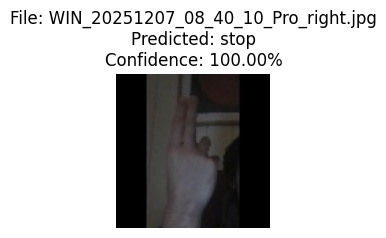

WIN_20251207_08_40_10_Pro_right.jpg: stop (100.00%)
All probabilities: [0.000000e+00 5.399403e-12 0.000000e+00 1.000000e+00]



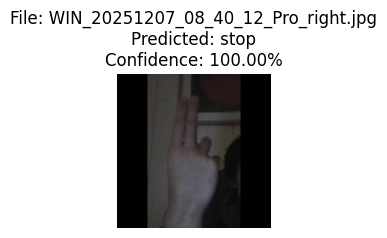

WIN_20251207_08_40_12_Pro_right.jpg: stop (100.00%)
All probabilities: [0.0000000e+00 5.1557643e-12 0.0000000e+00 1.0000000e+00]



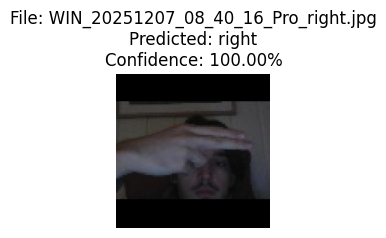

WIN_20251207_08_40_16_Pro_right.jpg: right (100.00%)
All probabilities: [1.6204904e-19 0.0000000e+00 1.0000000e+00 0.0000000e+00]



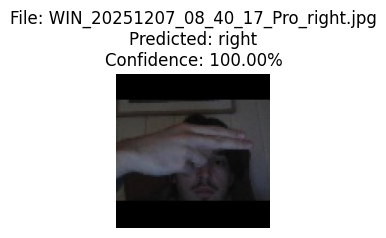

WIN_20251207_08_40_17_Pro_right.jpg: right (100.00%)
All probabilities: [4.9467055e-20 0.0000000e+00 1.0000000e+00 0.0000000e+00]



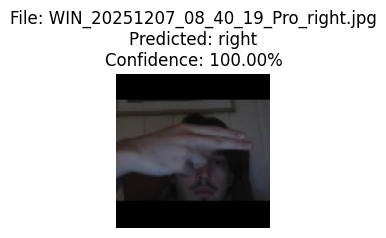

WIN_20251207_08_40_19_Pro_right.jpg: right (100.00%)
All probabilities: [2.425248e-21 0.000000e+00 1.000000e+00 0.000000e+00]



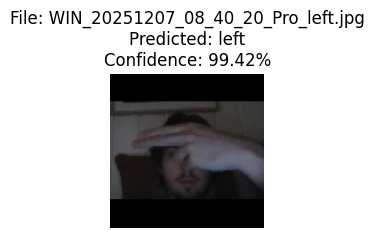

WIN_20251207_08_40_20_Pro_left.jpg: left (99.42%)
All probabilities: [0.99422884 0.         0.00577116 0.        ]



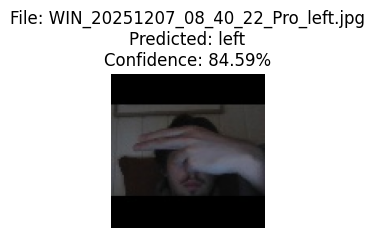

WIN_20251207_08_40_22_Pro_left.jpg: left (84.59%)
All probabilities: [0.8458867  0.         0.15411323 0.        ]



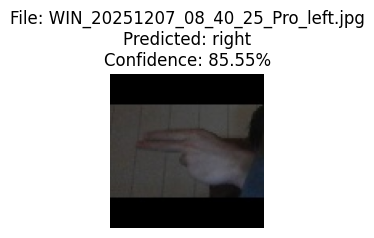

WIN_20251207_08_40_25_Pro_left.jpg: right (85.55%)
All probabilities: [0.14453237 0.         0.8554677  0.        ]



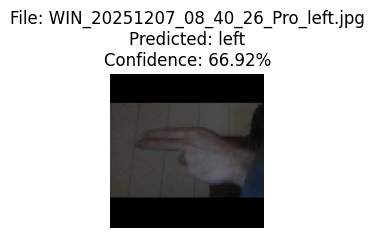

WIN_20251207_08_40_26_Pro_left.jpg: left (66.92%)
All probabilities: [0.66917926 0.         0.3308207  0.        ]



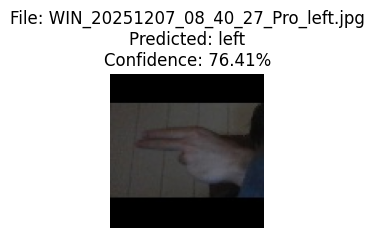

WIN_20251207_08_40_27_Pro_left.jpg: left (76.41%)
All probabilities: [0.7640509 0.        0.2359491 0.       ]



In [6]:
for img_file in image_files:
    img_path = os.path.join(test_folder, img_file)
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Add batch dimension
    img_batch = np.expand_dims(img, axis=0)

    prediction = model.predict(img_batch, verbose=0)  # verbose=0 to reduce output
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction) * 100
    
    # Display result image by image
    plt.figure(figsize=(3, 2))
    plt.imshow(img_rgb)
    plt.title(f'File: {img_file}\nPredicted: {classes[predicted_class]}\nConfidence: {confidence:.2f}%')
    plt.axis('off')
    plt.show()
    
    print(f"{img_file}: {classes[predicted_class]} ({confidence:.2f}%)")
    print(f"All probabilities: {prediction[0]}\n")